In [10]:
import cv2
import numpy as np
import dlib
import math
import os
import glob
from natsort import natsorted
from tqdm import tqdm
import matplotlib.pyplot as plt

In [26]:
input_path="C:\\Users\\festi\\Documents\\ISP\\MoleDetector-master\\dlib_test/*"
output_path="C:\\Users\\festi\\Documents\\ISP\\MoleDetector-master\\dlib_test/"
predictor_path = 'C:\\Users\\festi\\Downloads\\shape_predictor_68_face_landmarks.dat'
INDEX=9

In [27]:
images=natsorted(glob.glob(input_path))
print("Current Image")
print(images[INDEX])
image = cv2.imread(images[INDEX])
# print(image)

Current Image
C:\Users\festi\Documents\ISP\MoleDetector-master\dlib_test\98.jpg


# Blob detection

In [28]:
img = np.zeros((image.shape[0], image.shape[1], 3), np.uint8)
img[:, :, :] = image[:, :, :]
im = np.zeros((image.shape[0], image.shape[1], 3), np.uint8)
im[:, :, :] = 0 ## stores image after blur
im = cv2.GaussianBlur(img, (3, 3), 1) # original (5,5)
params = cv2.SimpleBlobDetector_Params()

In [29]:
detector_dlib = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor(predictor_path)
print(predictor_path)
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
land_marks = []
rects = detector_dlib(img_gray, 0)
print(len(rects))
for rect in rects:  # Directly iterate over rects
    land_marks_node = np.matrix([[p.x, p.y] for p in predictor(img_gray, rect).parts()])
    land_marks.append(land_marks_node)
print(len(land_marks))

C:\Users\festi\Downloads\shape_predictor_68_face_landmarks.dat
1
1


# Simple Blob Detector Params
Filter by Area
    - min area
Filter by Circularity
    - 0 = not circular, 1 = perfect circle
Filter by Convexity
    - min convexity
Filter by Inertia
    - intertia: minor length/major length
    - min intertia ratio
Filter by Color
    - 0 = dark blob, 255 = light blob
    - blob Color

In [30]:
params.minThreshold = 0
params.thresholdStep = 5
params.maxThreshold = 255

# Filter by Area.
params.filterByArea = True
params.minArea = 3  # original 20
# params.maxArea = 550

# Filter by Circularity
params.filterByCircularity = True
params.minCircularity = 0.4  #

# Filter by Convexity
params.filterByConvexity = True
params.minConvexity = 0.87

# Filter by Inertia
params.filterByInertia = True
params.minInertiaRatio = 0.2

# Filter by Color
params.filterByColor = True
params.blobColor = 0

# Extraxt nevus range

In [31]:
img_circle = np.zeros((img.shape[0], img.shape[1], 1), np.uint8)
img_circle[:, :, :] = 0  # 设置为全透明

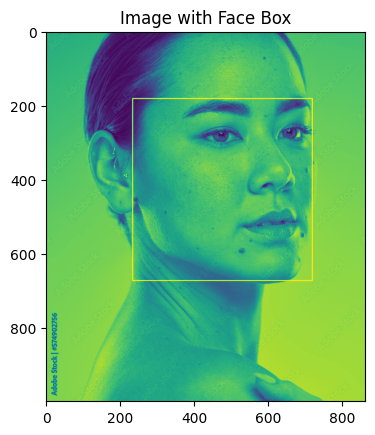

164.0


In [34]:
for i in range(len(land_marks)):
    land_mark = land_marks[i]

    p = land_mark
    x_max, y_max = 0, 0
    x_min, y_min = p[0][0, 0], p[0][0, 1]
    # Nose
    by_up, by_down, bx_left, bx_right = p[30][0, 1], p[33][0, 1], p[31][0, 0], p[35][0, 0]

    left_eye_minx, left_eye_miny = p[17][0,0], p[17][0,1]
    left_eye_maxx, left_eye_maxy = 0,0
    right_eye_minx, right_eye_miny = p[22][0,0], p[22][0,1]
    right_eye_maxx,right_eye_maxy = 0,0
    mouth_minx, mouth_miny = p[48][0,0], p[48][0,1]
    mouth_maxx, mouth_maxy = 0,0
    # Left eye
    for i in [17,18,19,20,21,36,37,38,39,40,41]:
        if p[i][0, 0] > left_eye_maxx: left_eye_maxx = p[i][0, 0]
        if p[i][0, 1] > left_eye_maxy: left_eye_maxy = p[i][0, 1]
        if p[i][0, 0] < left_eye_minx: left_eye_minx = p[i][0, 0]
        if p[i][0, 1] < left_eye_miny: left_eye_miny = p[i][0, 1]
    # Right eye
    for i in [22,23,24,25,26,42,43,44,45,46,47]:
        if p[i][0, 0] > right_eye_maxx: right_eye_maxx = p[i][0, 0]
        if p[i][0, 1] > right_eye_maxy: right_eye_maxy = p[i][0, 1]
        if p[i][0, 0] < right_eye_minx: right_eye_minx = p[i][0, 0]
        if p[i][0, 1] < right_eye_miny: right_eye_miny = p[i][0, 1]
    # Mouth
    for i in range(48,60):
        if p[i][0, 0] > mouth_maxx: mouth_maxx = p[i][0, 0]
        if p[i][0, 1] > mouth_maxy: mouth_maxy = p[i][0, 1]
        if p[i][0, 0] < mouth_minx: mouth_minx = p[i][0, 0]
        if p[i][0, 1] < mouth_miny: mouth_miny = p[i][0, 1]
    # Face
    for i in range(len(p)):
        if p[i][0, 0] > x_max: x_max = p[i][0, 0]
        if p[i][0, 1] > y_max: y_max = p[i][0, 1]
        if p[i][0, 0] < x_min: x_min = p[i][0, 0]
        if p[i][0, 1] < y_min: y_min = p[i][0, 1]
        
    remove = {'x_max': x_max, 'x_min'  : x_min,    'y_max' : y_max,   'y_min'   :y_min,
              'by_up': by_up, 'by_down': by_down, 'bx_left': bx_left, 'bx_right': bx_right,
              'left_eye_minx':left_eye_minx,'left_eye_miny':left_eye_miny,'left_eye_maxx':left_eye_maxx,
              'left_eye_maxy':left_eye_maxy,'right_eye_minx':right_eye_minx,'right_eye_miny':right_eye_miny,
              'right_eye_maxx':right_eye_maxx,'right_eye_maxy':right_eye_maxy,'mouth_minx':mouth_minx,
              'mouth_miny':mouth_miny,'mouth_maxx':mouth_maxx,'mouth_maxy':mouth_maxy}
    
    width = remove['x_max'] - remove['x_min']
    height = remove['y_max'] - remove['y_min']
    img_height, img_width = img_gray.shape
    w_min = max(0, remove['x_min'])
    w_max = min(img_width, remove['x_max'])
    h_min = max(0, remove['y_min'])
    h_max = min(img_height, remove['y_max'])
    # print(np.shape(img_gray))
    # print('y_max, y_min, x_max, x_min')
    # print(y_max, y_min, x_max, x_min)
    # print('Height, Width')
    # print(height, width)
    img_with_box = img_gray.copy()
    # Top and bottom horizontal lines (double thickness)
    img_with_box[h_min:h_min+3, w_min:w_max] = 255  # Top
    img_with_box[h_max-3:h_max, w_min:w_max] = 255  # Bottom
    # Left and right vertical lines (double thickness)
    img_with_box[h_min:h_max, w_min:w_min+3] = 255  # Left
    img_with_box[h_min:h_max, w_max-3:w_max] = 255  # Right
    plt.imshow(img_with_box)
    plt.title("Image with Face Box")
    plt.show()
    params.maxArea = int((width+height)/6)
    print(params.maxArea)

    

    # Create blob detector with params
    ver = (cv2.__version__).split('.')
    if int(ver[0]) < 3:
        detector = cv2.SimpleBlobDetector(params)
    else:
        detector = cv2.SimpleBlobDetector_create(params)

    keypoints = detector.detect(im)
    for i in range(len(keypoints)):
        #TODO
        x, y = int(keypoints[i].pt[0]), int(keypoints[i].pt[1])  # keypoints的中心坐标
        is_face = x >= remove['x_min']   and x <= remove['x_max']    and y >= remove['y_min'] and y <= remove['y_max']
        is_nose = x >= remove['bx_left'] and x <= remove['bx_right'] and y >= remove['by_up'] and y <= remove['by_down']
        is_left_eye = x >= remove['left_eye_minx'] and x <= remove['left_eye_maxx'] and y >= remove['left_eye_miny'] \
                        and y <= remove['left_eye_maxy']
        is_rigth_eye = x >= remove['right_eye_minx'] and x <= remove['right_eye_maxx'] and y >= remove['right_eye_miny'] \
                        and y <=remove['right_eye_maxy']
        is_moth = x >= remove['mouth_minx'] and x <= remove['mouth_maxx'] and y >= remove['mouth_miny'] \
                    and y <= remove['mouth_maxy']
        if is_face and not(is_nose) and not(is_left_eye) and not(is_rigth_eye) and not(is_moth):
            img_circle = cv2.circle(img_circle, (x, y), math.ceil(keypoints[i].size), 255, -1)


(1000, 863, 3)


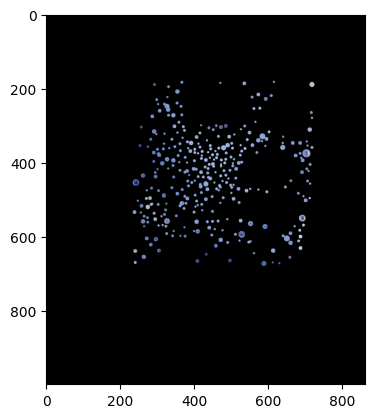

In [33]:
img[:,:,0][img_circle[:,:,0]==0] = 0
img[:,:,1][img_circle[:,:,0]==0] = 0
img[:,:,2][img_circle[:,:,0]==0] = 0

print(np.shape(img))
plt.imshow(img)
plt.show()